# Projeto - Previsão de saída de funcionários da empresa - VICTOR TINTEL

<p> Fonde de dados: https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset    

### Dicionário de dados: Descrição a que se refere cada variável do conjunto de dados

<p><p><p>
<br>Employee ID - Um identificador exclusivo atribuído a cada funcionário
<br>Age - A idade do funcionário, variando de 18 a 60 anos.
<br>Gender - O gênero do funcionário
<br>Years at Company - O tempo que o funcionário está na empresa
<br>Job Role - O departamento ou função em que o funcionário trabalha, codificado em categorias como Finanças, Saúde, <br>Tecnologia, Educação e Mídia.
<br>Monthly Income - O salário mensal do funcionário, em dólares.
<br>Work-Life Balance - O equilíbrio percebido pelo funcionário entre trabalho e vida pessoal (Ruim, Abaixo da média, Bom, Excelente)
<br>Job Satisfaction - A satisfação do funcionário com seu trabalho: (Muito baixo, Baixo, Médio, Alto)
<br>Performance Rating - A classificação de desempenho do funcionário: (Baixo, Abaixo da média, Médio, Alto)
<br>Number of Promotions - O número total de promoções que o funcionário recebeu.
<br>Overtime - Se o funcionário faz hora extra
<br>Distance from Home - A distância entre a casa do funcionário e o local de trabalho, em milhas.
<br>Education Level - O nível de educação mais alto atingido pelo funcionário: (Ensino médio, diploma de associado, bacharelado, mestrado, doutorado)
<br>Marital Status - O estado civil do funcionário: (Divorciado, casado, solteiro)
<br>Number of Dependents - Número de dependentes do funcionário
<br>Job Level - O nível do cargo do funcionário: (Iniciante, Médio, Sênior)
<br>Company Size - O tamanho da empresa para a qual o funcionário trabalha: (Pequeno, Médio, Grande)
<br>Company Tenure - O número total de anos em que o funcionário trabalha no setor.
<br>Remote Work - Se o funcionário trabalha remotamente: (Sim ou Não)
<br>Leadership Opportunities - Se o funcionário tem oportunidades de liderança: (Sim ou Não)
<br>Innovation Opportunities - Se o funcionário tem oportunidades de inovação: (Sim ou Não)
<br>Company Reputation - A percepção do funcionário sobre a reputação da empresa: (Muito ruim, Ruim, Bom, Excelente)
<br>Employee Recognition - O nível de reconhecimento que o funcionário recebe: (Muito baixo, Baixo, Médio, Alto)
<br>Attrition - Se o funcionário saiu da empresa, codificado como 0 (permaneceu) e 1 (Saiu).

### 1º Passo - Definição do Problema de Negócio / Objetivo
<p>Prever se um funcionário poderá pedir demissão da empresa onde trabalha.
    

### 2º Passo - Coleta de Dados e Importação dos Pacotes
<p> Vamos coletar os dados que serão utilizados e importar os pacotes que iremos utilizar

In [11]:
# Instalando a biblioteca category_encoders
!pip install category_encoders

In [1]:
## Carregando os pacotes que serão utilizados
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from category_encoders.one_hot import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Carregando os dados
df_original = pd.read_csv('dados_historicos.csv')

### 3º Passo - Analise Exploratória / Analise de Dados
<p> Vamos realizar diversas analises em nossos dados para identificar insights e situações que deverão ser tratadas.

In [9]:
# Visualizando as primeiras linhas do nosso DataFrame
df_original.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,NaN,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [10]:
# Visualizando as ultimas linhas do nosso DataFrame
df_original.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
59593,37195,50,Female,12,Education,4414.0,Fair,High,Average,1,Yes,66,Bachelor’s Degree,Single,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040.0,Fair,High,High,3,No,42,Associate Degree,Single,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944.0,Fair,High,High,0,Yes,34,Master’s Degree,Married,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931.0,Fair,Very High,Average,0,No,62,Bachelor’s Degree,Single,0,Entry,Large,9,No,No,No,Good,Low,Left
59597,15796,56,Male,19,Technology,6660.0,Good,High,Average,0,Yes,20,Master’s Degree,Married,3,Mid,Medium,81,No,No,No,Good,Low,Stayed


In [11]:
# Vamos renomear a coluna do nosso arquivo para deixar a nomenclatura mais amigável(Em Português)
df_original.columns = ['ID_Funcionario', 
              'Idade', 
              'Genero', 
              'Anos_Empresa', 
              'Funcao', 
              'Salario_Mensal',
              'Equilibrio_Vida',
              'Satisfacao',
              'Desempenho',
              'Qtd_Promocoes',
              'Hora_Extra',
              'Distancia_Casa',
              'Escolaridade',
              'Estado_Civil',
              'Qtd_Dependentes',
              'Cargo',
              'Tamanho_Empresa',
              'Qtd_Anos_Trabalho',
              'Trabalho_Remoto',
              'Oportunidade_Lideranca',
              'Oportunidade_Inovacao',
              'Reputacao_Empresa',
              'Reconhecimento',
              'Situacao']              

In [12]:
# Visualizando nosso DataFrame após a alteração
df_original.head()

,ID_Funcionario,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,NaN,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [13]:
# Visualizando o tamanho do nosso conjunto de dados
df_original.shape

(59598, 24)

In [14]:
#Informações sobre tipos de variáveis
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Funcionario          59598 non-null  int64  
 1   Idade                   59598 non-null  int64  
 2   Genero                  59598 non-null  object 
 3   Anos_Empresa            59598 non-null  int64  
 4   Funcao                  59598 non-null  object 
 5   Salario_Mensal          59591 non-null  float64
 6   Equilibrio_Vida         59598 non-null  object 
 7   Satisfacao              59598 non-null  object 
 8   Desempenho              59598 non-null  object 
 9   Qtd_Promocoes           59598 non-null  int64  
 10  Hora_Extra              59598 non-null  object 
 11  Distancia_Casa          59598 non-null  int64  
 12  Escolaridade            59598 non-null  object 
 13  Estado_Civil            59598 non-null  object 
 14  Qtd_Dependentes         59598 non-null

In [15]:
# Verificando se há valores nulos no DataFrame
# Há necessidade de tratar esses valores nulos na etapa de tratamento de dados
df_original.isnull().sum()

ID_Funcionario            0
Idade                     0
Genero                    0
Anos_Empresa              0
Funcao                    0
Salario_Mensal            7
Equilibrio_Vida           0
Satisfacao                0
Desempenho                0
Qtd_Promocoes             0
Hora_Extra                0
Distancia_Casa            0
Escolaridade              0
Estado_Civil              0
Qtd_Dependentes           0
Cargo                     0
Tamanho_Empresa           0
Qtd_Anos_Trabalho         0
Trabalho_Remoto           0
Oportunidade_Lideranca    0
Oportunidade_Inovacao     0
Reputacao_Empresa         0
Reconhecimento            0
Situacao                  0
dtype: int64

In [16]:
# Vamos analisar os valores únicos de cada variável
# Isso é importante no nosso processo de analise exploratória para identificarmos as colunas que iremos tratar como categoricas
valores_unicos = []
for i in df_original.columns[0:24].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))
    
# Uma forma mais simples de visualizar os valores únicos também seria utilizando o comando abaixo
# df_original.nunique()

ID_Funcionario : 59598
Idade : 42
Genero : 2
Anos_Empresa : 51
Funcao : 5
Salario_Mensal : 9570
Equilibrio_Vida : 4
Satisfacao : 4
Desempenho : 4
Qtd_Promocoes : 5
Hora_Extra : 2
Distancia_Casa : 99
Escolaridade : 5
Estado_Civil : 3
Qtd_Dependentes : 7
Cargo : 3
Tamanho_Empresa : 3
Qtd_Anos_Trabalho : 127
Trabalho_Remoto : 2
Oportunidade_Lideranca : 2
Oportunidade_Inovacao : 2
Reputacao_Empresa : 4
Reconhecimento : 4
Situacao : 2


In [17]:
# visualizando a quantidade mínima e máxima da variavel IDADE
print('Menor Idade:', df_original['Idade'].min())
print('Maior Idade:', df_original['Idade'].max())

Menor Idade: 18
Maior Idade: 59


In [18]:
# visualizando a quantidade mínima e máxima da variavel Anos_Empresa
# Precisaremos fazer algum tipo de tratamento nessa variável, pois há um número muito elevado de anos na empresa
print('Menor Tempo:', df_original['Anos_Empresa'].min())
print('Maior Tempo:', df_original['Anos_Empresa'].max())

Menor Tempo: 1
Maior Tempo: 51


In [19]:
# visualizando a quantidade mínima e máxima da variavel QTD_ANOS_TRABALHO
# Precisaremos fazer algum tipo de tratamento nessa variável, pois há um número muito elevado de anos de trabalho
print('Menor Tempo:', df_original['Qtd_Anos_Trabalho'].min())
print('Maior Tempo:', df_original['Qtd_Anos_Trabalho'].max())

Menor Tempo: 2
Maior Tempo: 128


In [20]:
# visualizando a quantidade mínima e máxima da variavel DISTANCIA_CASA
print('Menor Distância:', df_original['Distancia_Casa'].min())
print('Maior Distância:', df_original['Distancia_Casa'].max())

Menor Distância: 1
Maior Distância: 99


In [21]:
# visualizando a quantidade mínima e máxima da variavel QTD_DEPENDENTES
print('Menor Quantidade:', df_original['Qtd_Dependentes'].min())
print('Maior Quantidade:', df_original['Qtd_Dependentes'].max())

Menor Quantidade: 0
Maior Quantidade: 6


In [22]:
# visualizando a quantidade mínima e máxima da variavel SALÁRIO_MENSAL
print('Menor Salario:', df_original['Salario_Mensal'].min())
print('Maior Salario:', df_original['Salario_Mensal'].max())

Menor Salario: 1316.0
Maior Salario: 16149.0


In [23]:
# Medidas estatísticas básicas sobre as variaveis numéricas
df_original.describe()

,ID_Funcionario,Idade,Anos_Empresa,Salario_Mensal,Qtd_Promocoes,Distancia_Casa,Qtd_Dependentes,Qtd_Anos_Trabalho
count,59598.000000,59598.000000,59598.000000,59591.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.346327,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.445271,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [25]:
# Vamos identificar os casos em que a variavel QTD_ANOS_TRABALHO é superior a Idade do funcionário
# Para estes casos iremos substituir o valor da variável QTD_ANOS_TRABALHO pelo número 1 (1 ano)
df_original.loc[(df_original['Qtd_Anos_Trabalho'] > df_original['Idade'])].head(10)

,ID_Funcionario,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,NaN,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977.0,Fair,High,Below Average,3,No,37,Bachelor’s Degree,Married,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681.0,Fair,High,High,1,Yes,75,High School,Divorced,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223.0,Excellent,Very High,High,2,No,5,Master’s Degree,Married,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773.0,Good,Medium,High,1,Yes,39,High School,Married,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,NaN,Poor,High,Average,1,Yes,57,PhD,Single,4,Entry,Large,45,No,No,Yes,Good,Low,Left
11,9063,29,Female,6,Healthcare,8950.0,Poor,Medium,Low,2,No,26,Master’s Degree,Single,0,Mid,Medium,38,No,No,No,Poor,Medium,Left


In [26]:
# Vamos verificar quantos casos temos nesta situação em que a QTD_ANOS_TRABALHO é superior a Idade do funcionário

# Estou gerando um novo DataFrame a partir do filtro que fizemos
df_contagem = df_original.loc[(df_original['Qtd_Anos_Trabalho'] > df_original['Idade'])]

# Exibindo a informação
print('Quantidade de observações: ', df_contagem.shape[0])

# Excluindo o DataFrame porque não iremos mais utiliza-lo, criamos apenas para contagem e pra demonstração.
del df_contagem

Quantidade de observações:  42283


In [27]:
# Vamos fazer um agrupamento para identificar como os dados estão distribuidos na variavel QTD_ANOS_TRABALHO
# Vamos optar por realizar uma engenharia de atribuos e criar faixas de anos trabalhos, mas iremos criar a faixa de anos somente
# após realizarmos o tratamento mencionado anteriormente (QTD_ANOS_TRABALHO > Idade iremos alterar para 1)
df_original.groupby(['Qtd_Anos_Trabalho']).size()

Qtd_Anos_Trabalho
2       36
3       54
4       86
5      140
6      148
7      152
8      202
9      249
10     266
11     318
12     320
13     337
14     377
15     419
16     443
17     447
18     513
19     491
20     506
21     556
22     529
23     551
24     585
25     583
26     578
27     615
28     601
29     666
30     637
31     682
32     652
33     684
34     691
35     702
36     695
37     766
38     700
39     719
40     708
41     773
42     765
43     791
44     680
45     769
46     713
47     709
48     753
49     738
50     802
51     735
52     795
53     726
54     700
55     820
56     745
57     736
58     732
59     783
60     701
61     756
62     724
63     762
64     726
65     802
66     781
67     722
68     717
69     741
70     786
71     730
72     737
73     740
74     763
75     759
76     742
77     752
78     774
79     766
80     766
81     727
82     720
83     705
84     628
85     607
86     529
87     557
88     518
89     461
90     433
91 

In [29]:
# Precisamos avaliar se há alguma observação cuja variavel Qtd_Anos_Trabalho é superior a Anos_Empresa
# Vamos avaliar a seguir a quantidade de casos nesta situação para avaliarmos como será o tratamento de dados
df_original.loc[(df_original['Qtd_Anos_Trabalho'] > df_original['Anos_Empresa'])].head()

,ID_Funcionario,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,NaN,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [30]:
# Vamos verificar quantos casos temos nesta situação em que a QTD_ANOS_TRABALHO é superior ao tempo de empresa

# ATENÇÃO ATENÇÃO ATENÇÃO # -- Quantidade é exatamente igual ao número de observações do conjunto de dados!
# Sendo assim o ideal é descartar essa variável, pois comparando ela com a Idade e Anos Empresa podemos constatar que essa
# variável não é coerente e pode causar problemas em nosso modelo de machine learning

# Estou gerando um novo DataFrame a partir do filtro que fizemos
df_contagem = df_original.loc[(df_original['Qtd_Anos_Trabalho'] > df_original['Anos_Empresa'])]

# Exibindo a informação
print('Quantidade de observações: ', df_contagem.shape[0])

# Excluindo o DataFrame porque não iremos mais utiliza-lo, criamos apenas para contagem e pra demonstração.
del df_contagem

Quantidade de observações:  59598


In [31]:
# Vamos avaliar se há algum funcionario com Anos_Empresa superior a sua idade
# Nesse caso não há essa situação
df_original.loc[(df_original['Anos_Empresa'] > df_original['Idade'])].head()

,ID_Funcionario,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao


In [32]:
# Vamos fazer um filtro calculando a Idade - Anos_Empresa e considerar o que for menor de 18 anos de idade.
df_original.loc[(df_original['Idade'] - df_original['Anos_Empresa'] < 18)].head(10)

,ID_Funcionario,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
4,65026,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
8,32714,57,Male,44,Education,3773.0,Good,Medium,High,1,Yes,39,High School,Married,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
12,21896,47,Female,38,Technology,NaN,Fair,Very High,High,1,No,78,Associate Degree,Married,0,Entry,Small,68,No,No,No,Good,Low,Left
13,28098,31,Male,22,Healthcare,8090.0,Fair,Medium,High,4,Yes,30,Associate Degree,Divorced,2,Mid,Small,84,No,No,No,Good,Medium,Stayed
14,22068,40,Female,30,Technology,6350.0,Good,High,Average,0,No,98,High School,Single,0,Senior,Large,96,No,No,No,Good,High,Stayed
16,55668,19,Female,9,Technology,8242.0,Excellent,Medium,Average,2,Yes,17,High School,Single,3,Mid,Small,63,No,No,No,Fair,High,Left
18,17034,49,Female,37,Media,6252.0,Fair,High,High,2,No,60,Bachelor’s Degree,Divorced,4,Senior,Medium,70,No,No,No,Good,High,Stayed
20,17209,51,Female,41,Finance,8733.0,Good,High,Average,2,Yes,18,Master’s Degree,Divorced,3,Mid,Small,72,No,No,No,Good,High,Stayed


In [33]:
# Vamos fazer um filtro calculando a Idade - Anos_Empresa e considerar o que for menor de 18 anos de idade e ver a qtd total.
# Na etapa de tratamento de dados iremos adotar algum critério para ajustar esses dados.

# Estou gerando um novo DataFrame a partir do filtro que fizemos
df_contagem = df_original.loc[(df_original['Idade'] - df_original['Anos_Empresa'] < 18)]

# Exibindo a informação
print('Quantidade de observações: ', df_contagem.shape[0])

# Excluindo o DataFrame porque não iremos mais utiliza-lo, criamos apenas para contagem e pra demonstração.
del df_contagem

Quantidade de observações:  23797


In [34]:
df_original.groupby(['Anos_Empresa']).size()

Anos_Empresa
1     2421
2     2453
3     2366
4     2302
5     2456
6     2344
7     2336
8     2403
9     2400
10    2380
11    2326
12    2206
13    2048
14    1910
15    1837
16    1726
17    1570
18    1483
19    1403
20    1365
21    1272
22    1215
23    1223
24    1101
25    1023
26     998
27     984
28     889
29     854
30     793
31     761
32     706
33     657
34     648
35     508
36     519
37     464
38     454
39     446
40     381
41     345
42     294
43     266
44     216
45     239
46     189
47     145
48     111
49      87
50      49
51      26
dtype: int64

In [35]:
# Vamos fazer um agrupamento pela variável ANOS_EMPRESA e IDADE para podermos analisar melhor as discrepancias
# Observe que realmente vamos precisar fazer um tratamento nesses dados porque o tempo de empresa x idade não é coerente
df_original.groupby(['Anos_Empresa','Idade']).size()

Anos_Empresa  Idade
1             18       116
              19       135
              20       135
              21       116
              22       116
              23        95
              24        75
              25        85
              26        87
              27        59
              28        62
              29        55
              30        67
              31        64
              32        52
              33        48
              34        63
              35        68
              36        56
              37        53
              38        51
              39        51
              40        62
              41        42
              42        45
              43        47
              44        38
              45        34
              46        43
              47        33
              48        36
              49        44
              50        38
              51        24
              52        23
              53        26
        

In [37]:
#carregar variaveis númericas para plot
variaveis_numericas = []
for i in df_original.columns[0:24].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

In [38]:
#carregar variaveis categoricas para plot
variaveis_categoricas = []
for i in df_original.columns[0:24].tolist():
        if df_original.dtypes[i] == 'object' or df_original.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i)  

In [39]:
# Quantidade das variaveis numéricas e categóricas
print('Quantidade de variáveis numéricas: ', len(variaveis_numericas))
print('Quantidade de variáveis categóricas: ', len(variaveis_categoricas))

Quantidade de variáveis numéricas:  8
Quantidade de variáveis categóricas:  16


In [40]:
# Variáveis numéricas
variaveis_numericas

['ID_Funcionario',
 'Idade',
 'Anos_Empresa',
 'Salario_Mensal',
 'Qtd_Promocoes',
 'Distancia_Casa',
 'Qtd_Dependentes',
 'Qtd_Anos_Trabalho']

In [42]:
# Variáveis categóricas
variaveis_categoricas

['Genero',
 'Funcao',
 'Equilibrio_Vida',
 'Satisfacao',
 'Desempenho',
 'Hora_Extra',
 'Escolaridade',
 'Estado_Civil',
 'Cargo',
 'Tamanho_Empresa',
 'Trabalho_Remoto',
 'Oportunidade_Lideranca',
 'Oportunidade_Inovacao',
 'Reputacao_Empresa',
 'Reconhecimento',
 'Situacao']

In [44]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Funcionario          59598 non-null  int64  
 1   Idade                   59598 non-null  int64  
 2   Genero                  59598 non-null  object 
 3   Anos_Empresa            59598 non-null  int64  
 4   Funcao                  59598 non-null  object 
 5   Salario_Mensal          59591 non-null  float64
 6   Equilibrio_Vida         59598 non-null  object 
 7   Satisfacao              59598 non-null  object 
 8   Desempenho              59598 non-null  object 
 9   Qtd_Promocoes           59598 non-null  int64  
 10  Hora_Extra              59598 non-null  object 
 11  Distancia_Casa          59598 non-null  int64  
 12  Escolaridade            59598 non-null  object 
 13  Estado_Civil            59598 non-null  object 
 14  Qtd_Dependentes         59598 non-null

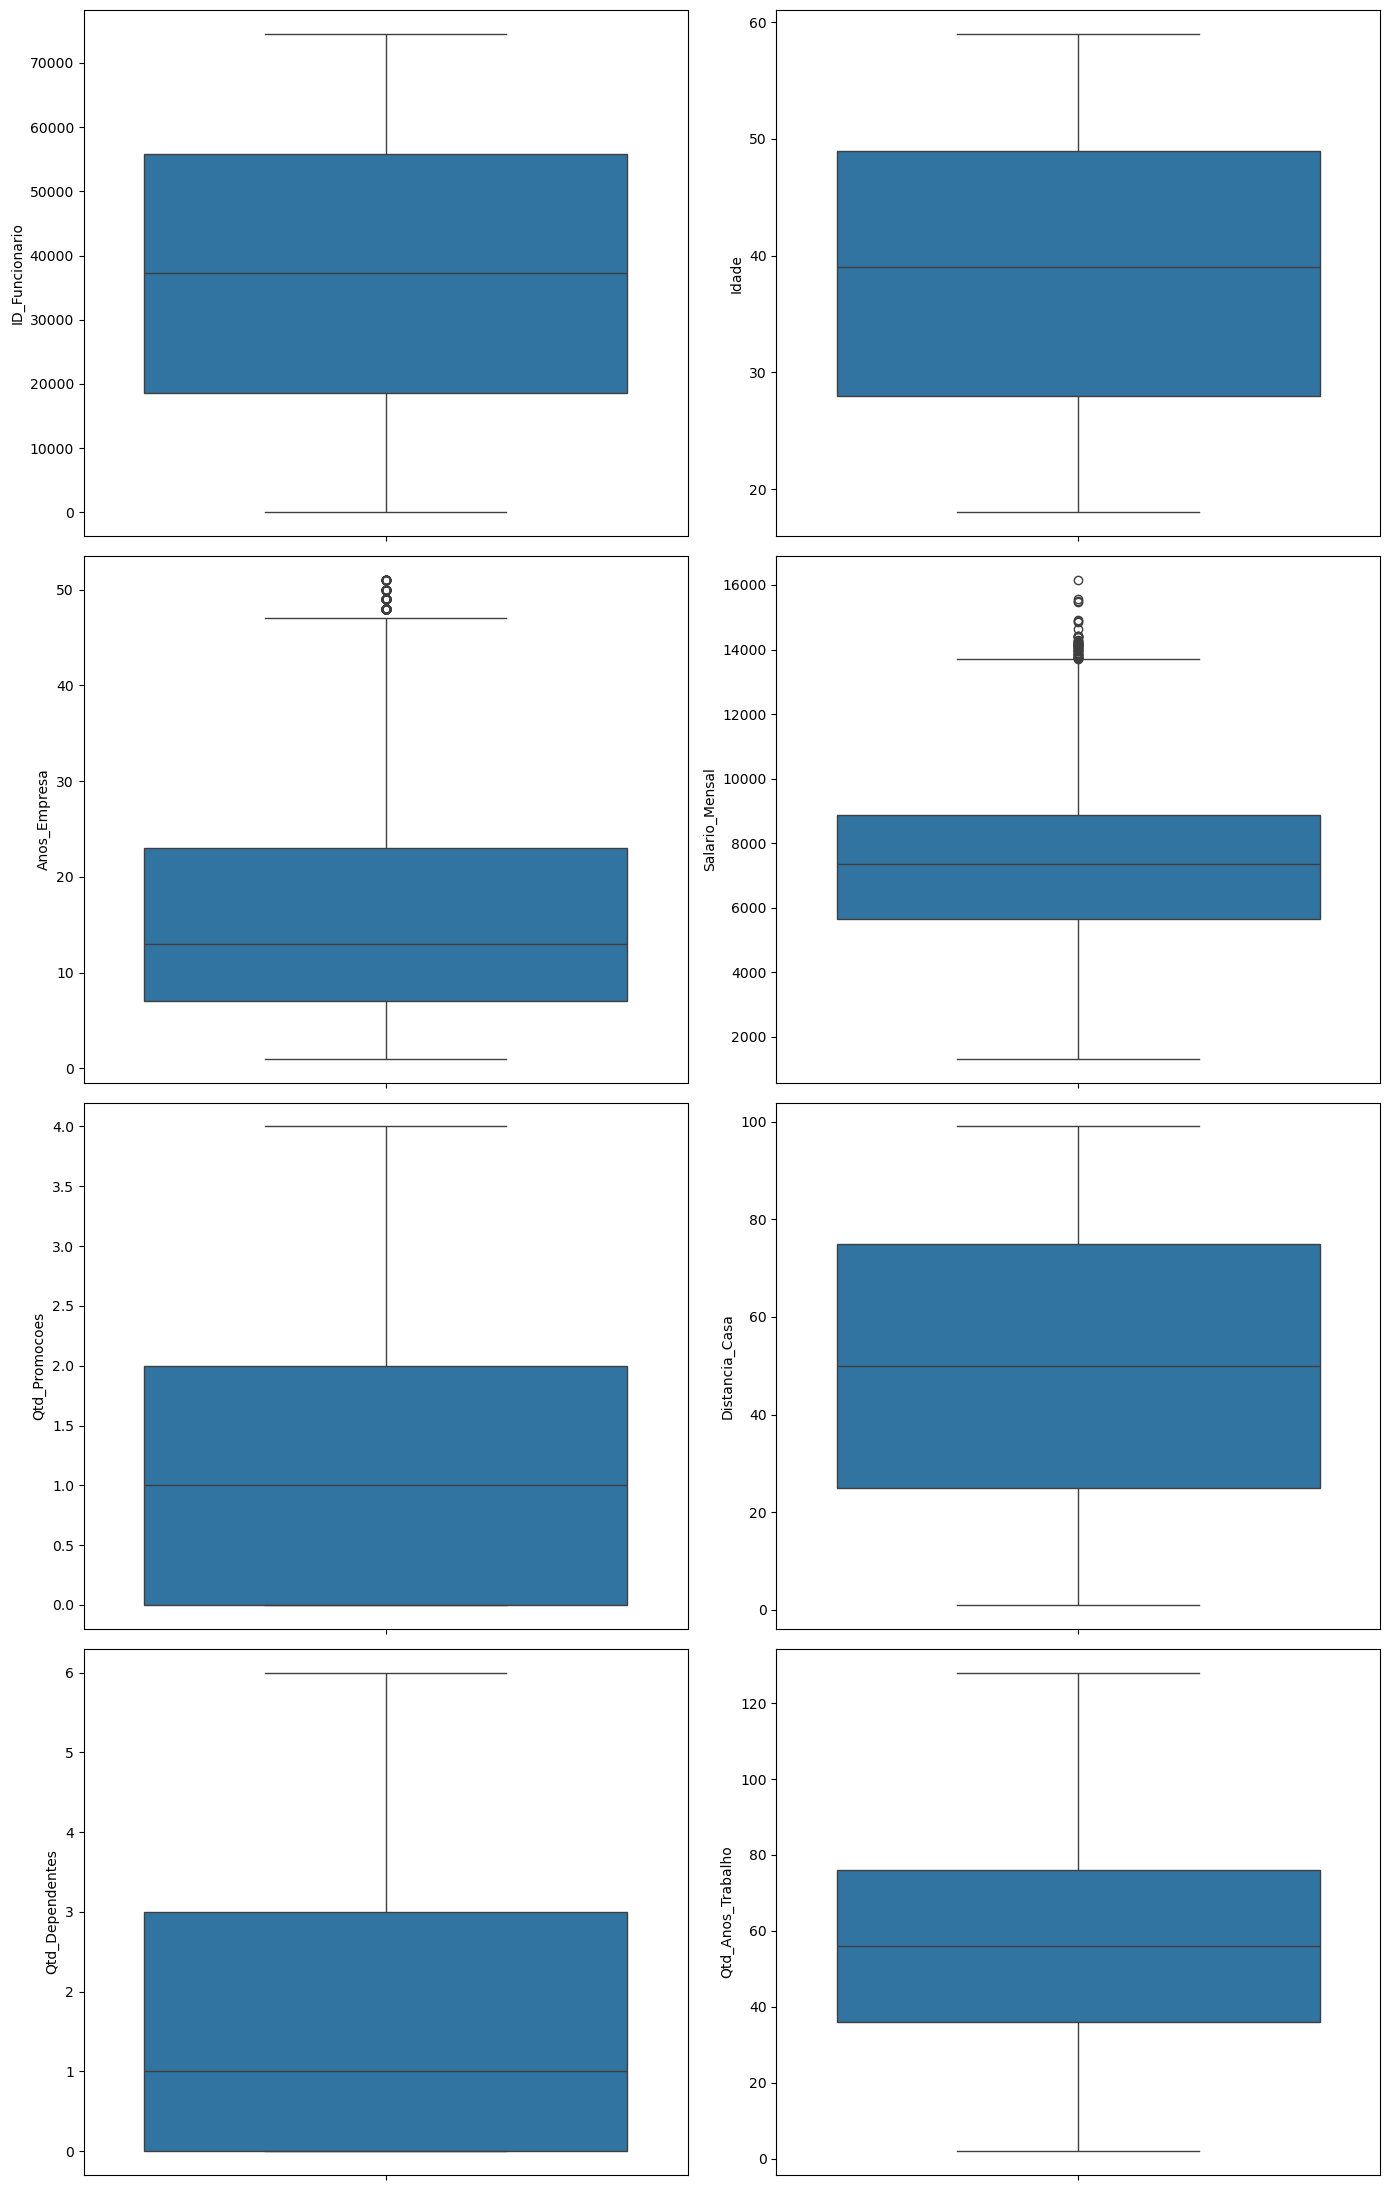

In [46]:
# Vamos analisar os boxplot para podermos avaliar se há "possíveis outliers"
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 22.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

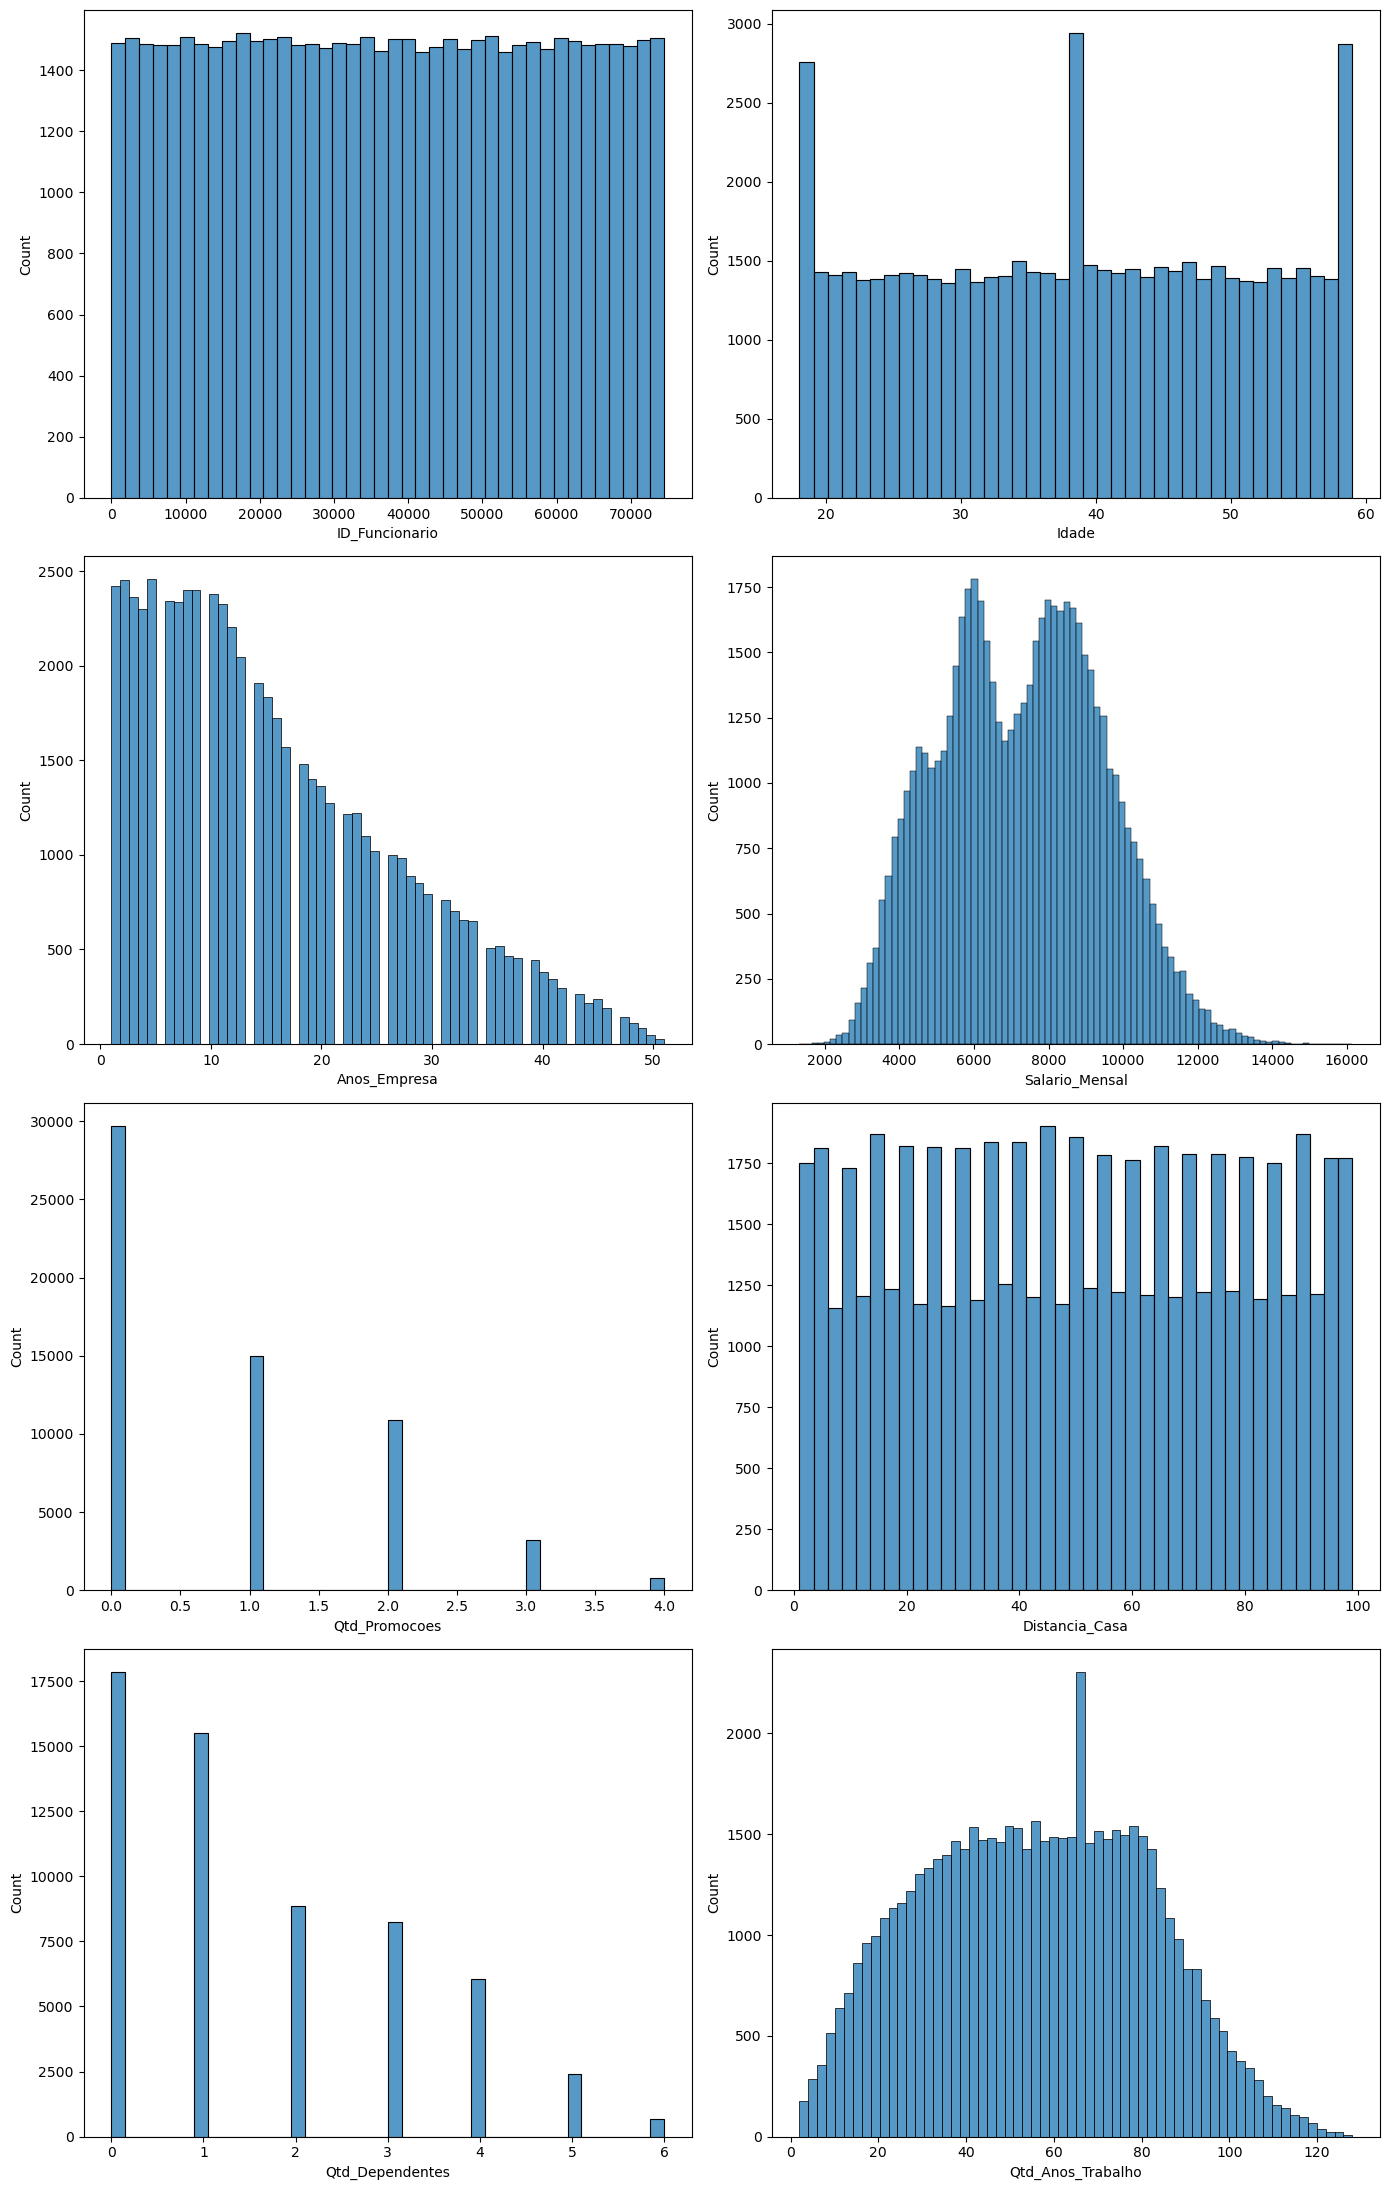

In [48]:
# Vamos avaliar o histograma para analisarmos como os dados estão distribuídos.

plt.rcParams["figure.figsize"] = [14.00, 22.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

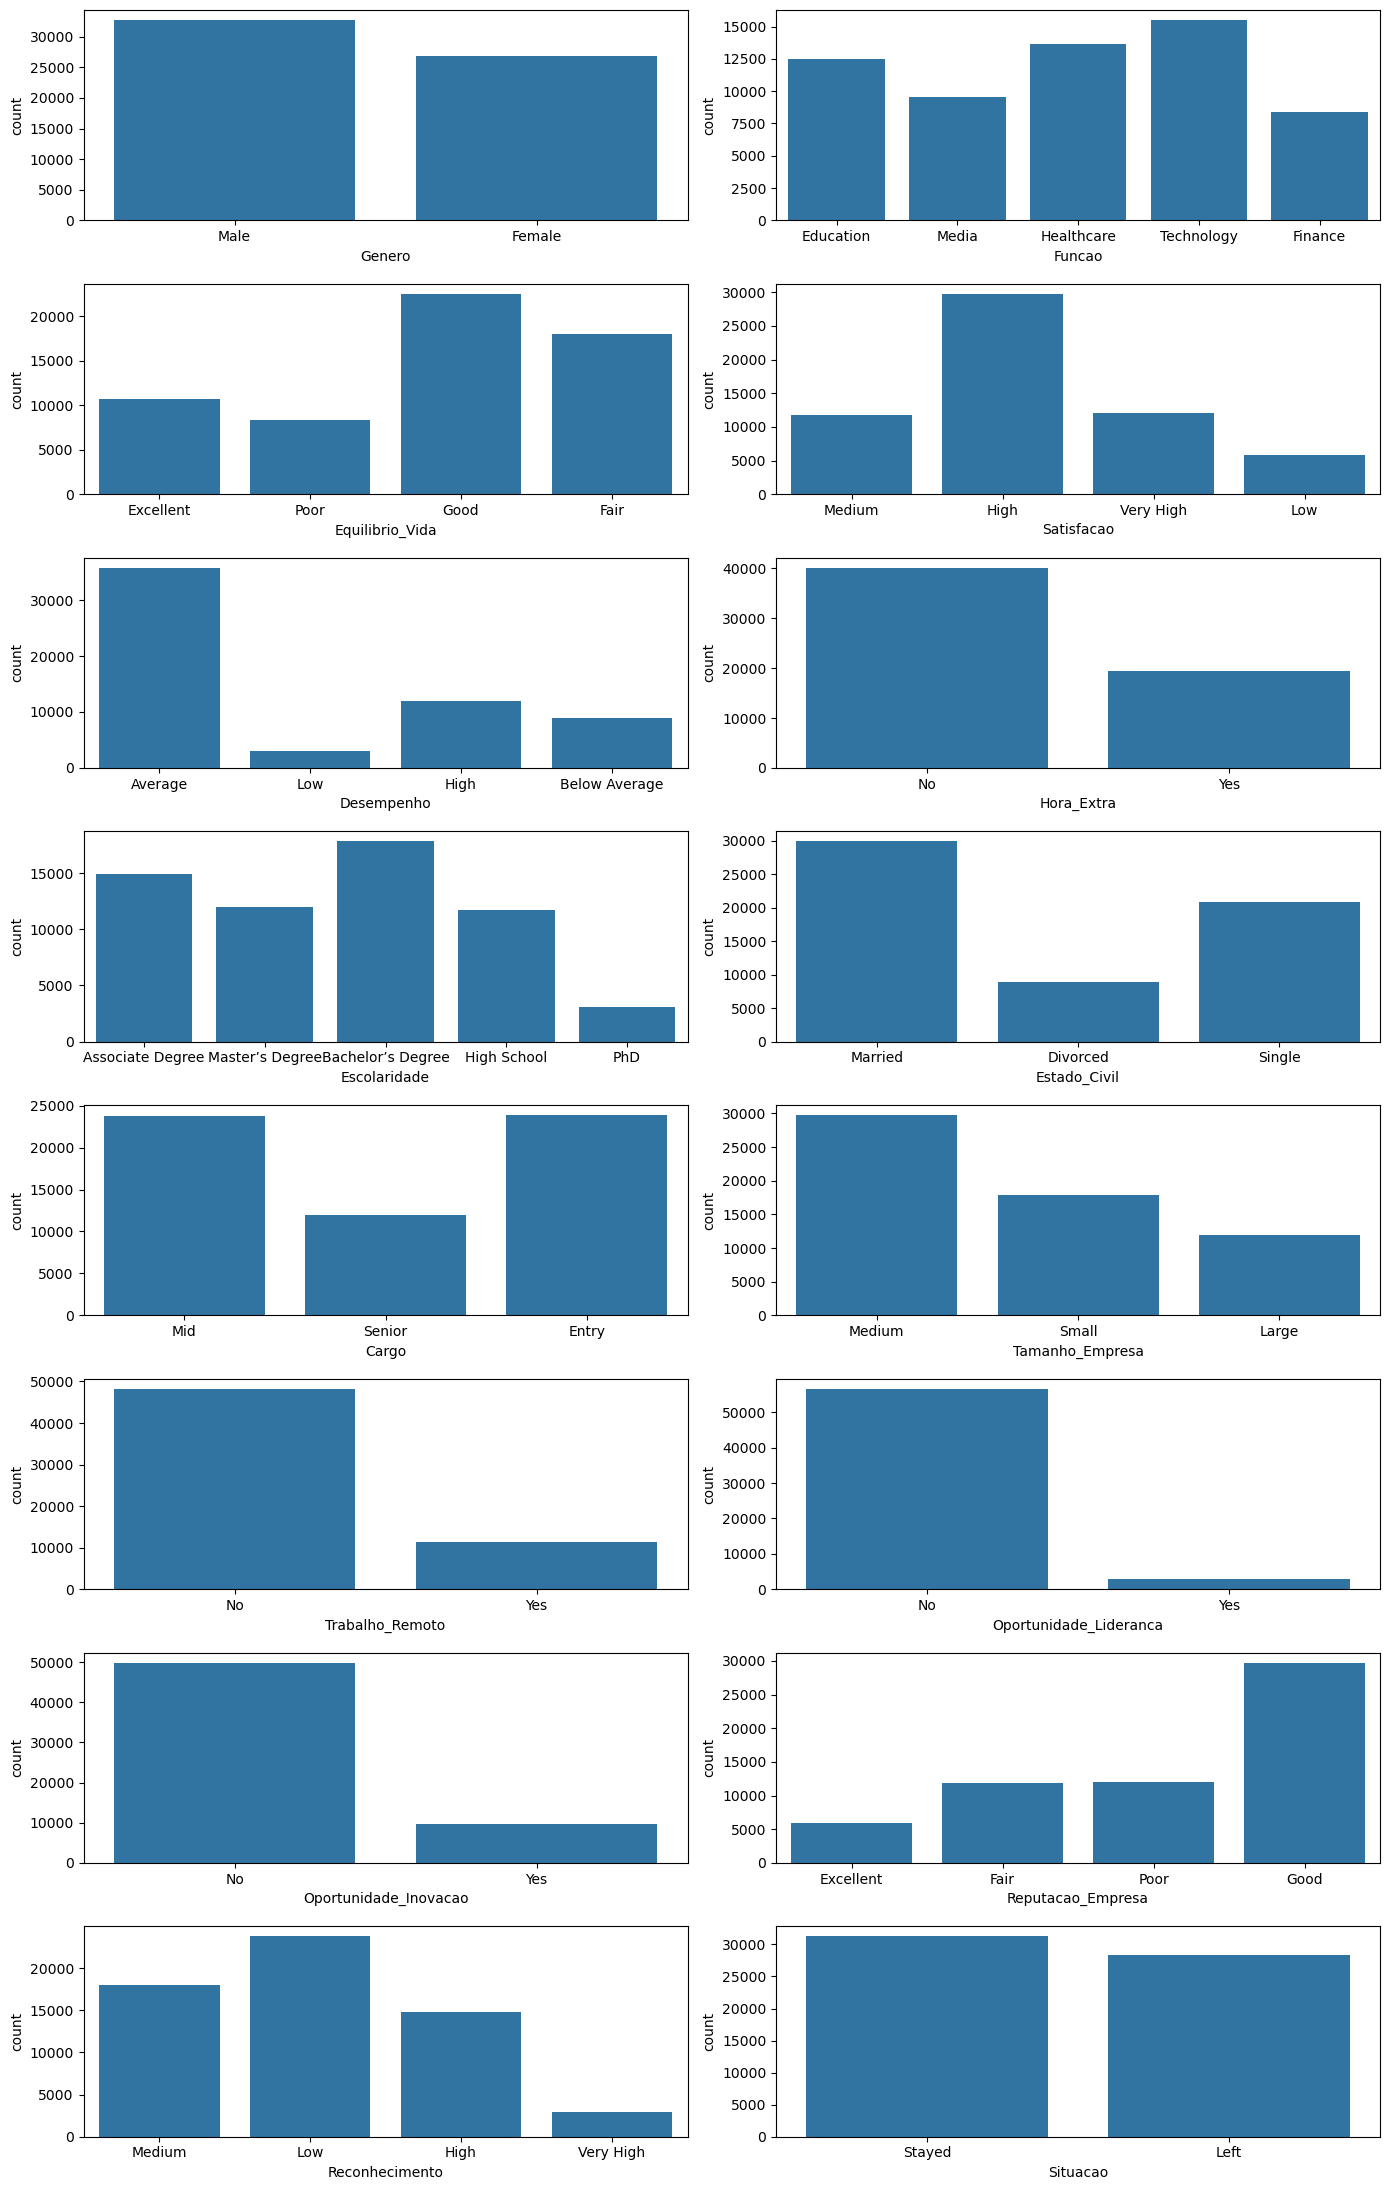

In [55]:
# Vamos analisar as variáveis categóricas para entendermos como os valores estão distribuídos

plt.rcParams["figure.figsize"] = [14.00, 22.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(8, 2) #8 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_categoricas:
    sns.countplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

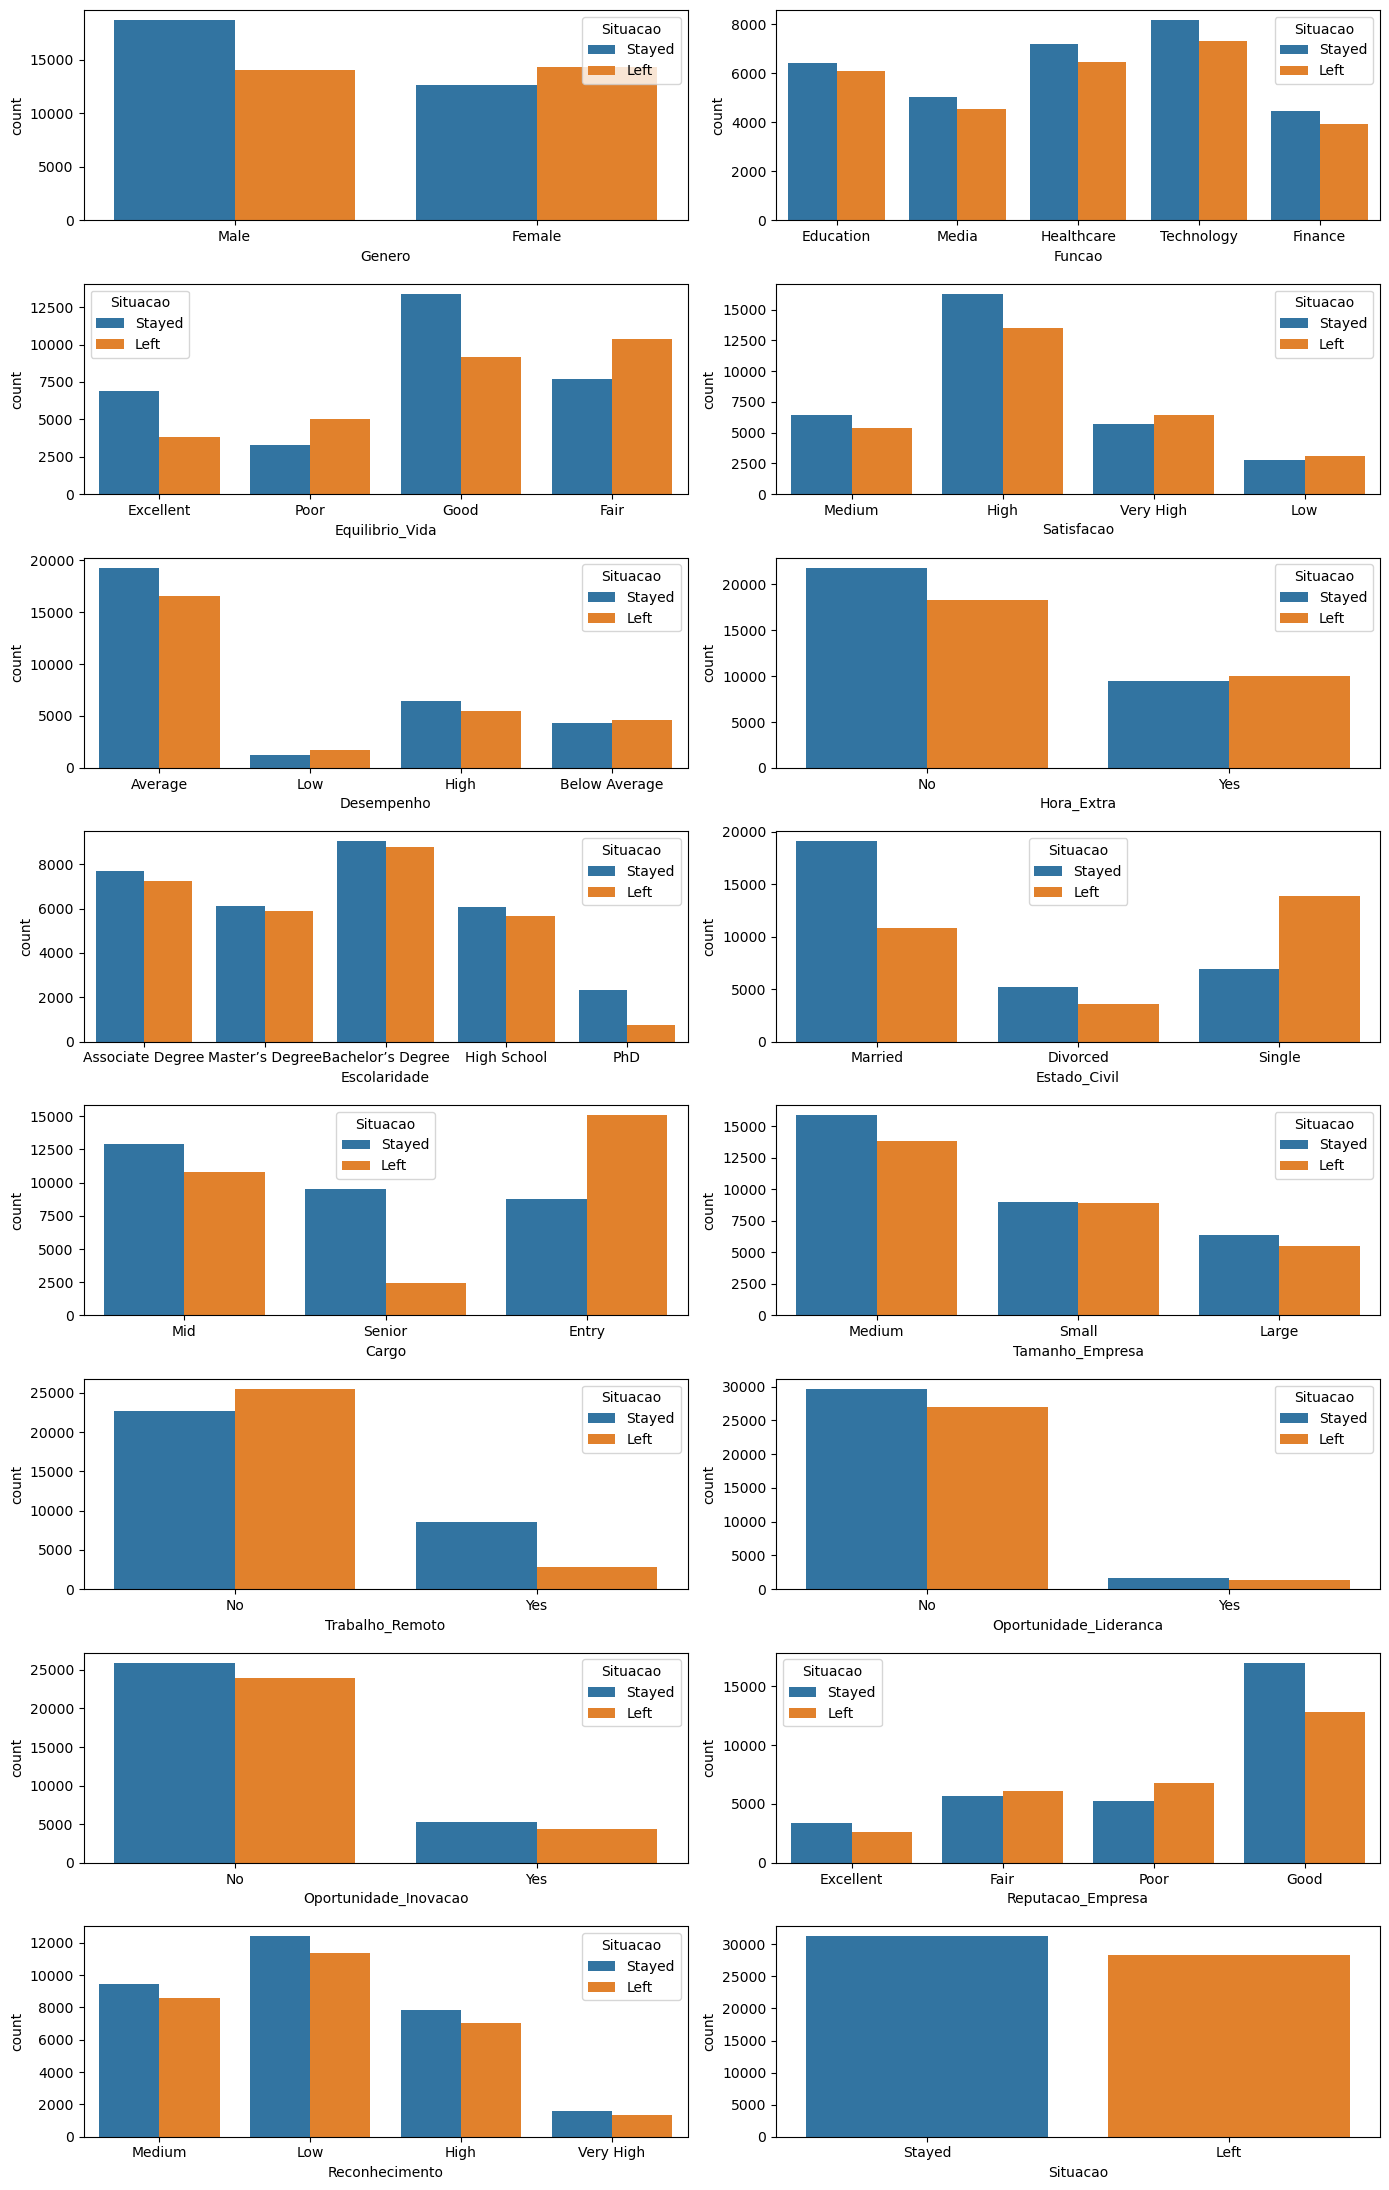

In [58]:
# Vamos analisar as variáveis categóricas para entendermos como os valores estão distribuídos em relação a variável alvo

plt.rcParams["figure.figsize"] = [14.00, 22.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(8, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_categoricas:
    sns.countplot(data = df_original, x=i, hue = "Situacao", ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [59]:
# Avaliando a divergência de quantidade na variável alvo para balanceamento
# Aqui podemos constatar conforme o gráfico demonstrou que a variável alvo está ligeiramente desbalanceada
# Iremos realizar o balanceamento da variável alvo na etapa de tratamento de dados
df_original.groupby(['Situacao']).size()

# 31.260 Permaneceu na empresa
# 28.338 Deixou a empresa

Situacao
Left      28338
Stayed    31260
dtype: int64

In [61]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Funcionario          59598 non-null  int64  
 1   Idade                   59598 non-null  int64  
 2   Genero                  59598 non-null  object 
 3   Anos_Empresa            59598 non-null  int64  
 4   Funcao                  59598 non-null  object 
 5   Salario_Mensal          59591 non-null  float64
 6   Equilibrio_Vida         59598 non-null  object 
 7   Satisfacao              59598 non-null  object 
 8   Desempenho              59598 non-null  object 
 9   Qtd_Promocoes           59598 non-null  int64  
 10  Hora_Extra              59598 non-null  object 
 11  Distancia_Casa          59598 non-null  int64  
 12  Escolaridade            59598 non-null  object 
 13  Estado_Civil            59598 non-null  object 
 14  Qtd_Dependentes         59598 non-null

### 4º Passo - Pré-Processamento e Tratamento dos Dados
<p> Vamos realizar nessa etapa a preparação necessária nos dados para podermos criar nosso modelo de Machine Learning
<p>    
<br>1 - A variável ID_Funcionario não será utilizada, pois trata-se da identificação do funcionário 
<br>2 - A variável Salario_Mensal possui valores nulos e neste caso iremos preencher os valores com a mediana dos dados    
<br>3 - Iremos criar uma Faixa_Salarial com base na variável Salario_Mensal        
<br>4 - A variavel Qtd_Anos_Trabalho será excluída, conforme avaliamos no processo de analise exploratória       
<br>5 - A variavel Anos_Empresa cujo a subtração da idade for inferior a 18, iremos deixar definido como 1
<br>6 - A variável Situacao vamos alterar da seguinte forma: codificado como 0 (Stayed - permaneceu) e 1 (Left - Saiu)
<br>7 - A variável Situacao vamos alterar para o tipo CATEGORY
<br>8 - Vamos fazer o OrdinalEncoder das variáveis do tipo object (Categoricas Ordinais)
<br>9 - Vamos fazer o OneHotEncoder das variáveis do tipo object (Categoricas Nominais)    
<br>10 - Separar as variaveis preditoras da variável alvo    
<br>11 - A variavel Situacao que é nossa variavel TARGET/ALVO será balanceada
<br>12 - Separar os dados em Dados de Treino e Dados de Teste
<br>13 -Vamos realizar a normalização dos dados    

In [95]:
# Removendo a coluna ID_Funcionario do DataFrame
df_original = df_original.drop(columns=['ID_Funcionario'])
df_original.head()

,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,NaN,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [97]:
# Preenchendo os valores nulos com a mediana dos dados
df_original['Salario_Mensal'] = df_original['Salario_Mensal'].fillna(df_original['Salario_Mensal'].median())

In [99]:
df_original.isnull().sum()

Idade                     0
Genero                    0
Anos_Empresa              0
Funcao                    0
Salario_Mensal            0
Equilibrio_Vida           0
Satisfacao                0
Desempenho                0
Qtd_Promocoes             0
Hora_Extra                0
Distancia_Casa            0
Escolaridade              0
Estado_Civil              0
Qtd_Dependentes           0
Cargo                     0
Tamanho_Empresa           0
Qtd_Anos_Trabalho         0
Trabalho_Remoto           0
Oportunidade_Lideranca    0
Oportunidade_Inovacao     0
Reputacao_Empresa         0
Reconhecimento            0
Situacao                  0
dtype: int64

In [101]:
# Criar faixa salarial com base na variavel Salario_Mensal

# Até $5.000
# De $5.001 até $10.000 
# Acima de $10.000

valores = [-100, 5000, 10000, 20000]
rotulos = ['Até $5.000', 'De $5.001 até $10.000 ', 'Acima de $10.000']
df_original['Faixa_Salarial'] = pd.cut(df_original['Salario_Mensal'], bins=valores, labels=rotulos)
pd.value_counts(df_original.Faixa_Salarial)

Faixa_Salarial
De $5.001 até $10.000     43318
Até $5.000                 9781
Acima de $10.000           6499
Name: count, dtype: int64

In [103]:
df_original.head()

,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Qtd_Anos_Trabalho,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao,Faixa_Salarial
0,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed,De $5.001 até $10.000
1,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed,De $5.001 até $10.000
2,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed,De $5.001 até $10.000
3,36,Female,7,Education,7354.0,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed,De $5.001 até $10.000
4,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed,Até $5.000


In [106]:
# Removendo a coluna Qtd_Anos_Trabalho do DataFrame
df_original = df_original.drop(columns=['Qtd_Anos_Trabalho'])
df_original.head()

,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao,Faixa_Salarial
0,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed,De $5.001 até $10.000
1,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,No,No,No,Fair,Low,Stayed,De $5.001 até $10.000
2,24,Female,10,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,No,No,No,Poor,Low,Stayed,De $5.001 até $10.000
3,36,Female,7,Education,7354.0,Good,High,High,1,No,27,High School,Single,2,Mid,Small,Yes,No,No,Good,Medium,Stayed,De $5.001 até $10.000
4,56,Male,41,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,Stayed,Até $5.000


In [108]:
# Tratando o campo Anos_Empresa cujo a Idade - Anos_Empresa for inferior a 18
df_original.loc[(df_original['Idade'] - df_original['Anos_Empresa'] < 18), 'Anos_Empresa'] = 1

In [110]:
# Verificando se foi realizado com sucesso nosso tratamento de dados
df_original.loc[(df_original['Idade'] - df_original['Anos_Empresa'] < 17)].head()

,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao,Faixa_Salarial


In [112]:
# Vamos tratar a variavel alvo - Situação

# Vamos alterar os valores para numéricos (Stayed - Permaneceu = 0 / Left - Deixou Empresa = 1)
df_original['Situacao'] = df_original['Situacao'].map({'Stayed':0, 'Left':1})

# Em seguida vamos alterar o tipo da variável para Category
df_original['Situacao'] = df_original['Situacao'].astype('category')

In [114]:
# Vamos verificar se nosso tratamento de dados ficou correto
# 31.260 Permaneceu na empresa
# 28.338 Deixou a empresa
df_original.groupby(['Situacao']).size()

Situacao
0    31260
1    28338
dtype: int64

In [116]:
# Visualizando os dados só para comprovar a alteração...
df_original.head()

,Idade,Genero,Anos_Empresa,Funcao,Salario_Mensal,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao,Faixa_Salarial
0,31,Male,1,Education,5390.0,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,No,No,No,Excellent,Medium,0,De $5.001 até $10.000
1,59,Female,4,Media,5534.0,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,No,No,No,Fair,Low,0,De $5.001 até $10.000
2,24,Female,1,Healthcare,8159.0,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,No,No,No,Poor,Low,0,De $5.001 até $10.000
3,36,Female,7,Education,7354.0,Good,High,High,1,No,27,High School,Single,2,Mid,Small,Yes,No,No,Good,Medium,0,De $5.001 até $10.000
4,56,Male,1,Education,4821.0,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,0,Até $5.000


In [118]:
# Visualizando as variaveis do nosso DataFrame
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Idade                   59598 non-null  int64   
 1   Genero                  59598 non-null  object  
 2   Anos_Empresa            59598 non-null  int64   
 3   Funcao                  59598 non-null  object  
 4   Salario_Mensal          59598 non-null  float64 
 5   Equilibrio_Vida         59598 non-null  object  
 6   Satisfacao              59598 non-null  object  
 7   Desempenho              59598 non-null  object  
 8   Qtd_Promocoes           59598 non-null  int64   
 9   Hora_Extra              59598 non-null  object  
 10  Distancia_Casa          59598 non-null  int64   
 11  Escolaridade            59598 non-null  object  
 12  Estado_Civil            59598 non-null  object  
 13  Qtd_Dependentes         59598 non-null  int64   
 14  Cargo                 

In [120]:
# Vamos reorganizar as colunas do DataFrame para deixarmos a variavel target no final
# Como criamos uma variável referente a Faixa_Salarial que representa a mesma coisa que Salario_Mensal, então não iremos mais
# utilizar a variável Salario_Mensal.

columns = ['Idade', 
           'Genero', 
           'Anos_Empresa', 
           'Funcao',            
           'Faixa_Salarial',
           'Equilibrio_Vida',
           'Satisfacao',
           'Desempenho',
           'Qtd_Promocoes',
           'Hora_Extra',
           'Distancia_Casa',
           'Escolaridade',
           'Estado_Civil',
           'Qtd_Dependentes',
           'Cargo',
           'Tamanho_Empresa',           
           'Trabalho_Remoto',
           'Oportunidade_Lideranca',
           'Oportunidade_Inovacao',
           'Reputacao_Empresa',
           'Reconhecimento',           
           'Situacao']              

df_original = pd.DataFrame(df_original, columns=columns)

In [124]:
# Visualizando o dados para confirmarmos as alterações...
df_original.head()

,Idade,Genero,Anos_Empresa,Funcao,Faixa_Salarial,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,31,Male,1,Education,De $5.001 até $10.000,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,No,No,No,Excellent,Medium,0
1,59,Female,4,Media,De $5.001 até $10.000,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,No,No,No,Fair,Low,0
2,24,Female,1,Healthcare,De $5.001 até $10.000,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,No,No,No,Poor,Low,0
3,36,Female,7,Education,De $5.001 até $10.000,Good,High,High,1,No,27,High School,Single,2,Mid,Small,Yes,No,No,Good,Medium,0
4,56,Male,1,Education,Até $5.000,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,0


In [126]:
# Visualizando as informações das variaveis
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Idade                   59598 non-null  int64   
 1   Genero                  59598 non-null  object  
 2   Anos_Empresa            59598 non-null  int64   
 3   Funcao                  59598 non-null  object  
 4   Faixa_Salarial          59598 non-null  category
 5   Equilibrio_Vida         59598 non-null  object  
 6   Satisfacao              59598 non-null  object  
 7   Desempenho              59598 non-null  object  
 8   Qtd_Promocoes           59598 non-null  int64   
 9   Hora_Extra              59598 non-null  object  
 10  Distancia_Casa          59598 non-null  int64   
 11  Escolaridade            59598 non-null  object  
 12  Estado_Civil            59598 non-null  object  
 13  Qtd_Dependentes         59598 non-null  int64   
 14  Cargo                 

In [128]:
df_original.head() 

,Idade,Genero,Anos_Empresa,Funcao,Faixa_Salarial,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,31,Male,1,Education,De $5.001 até $10.000,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,No,No,No,Excellent,Medium,0
1,59,Female,4,Media,De $5.001 até $10.000,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,No,No,No,Fair,Low,0
2,24,Female,1,Healthcare,De $5.001 até $10.000,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,No,No,No,Poor,Low,0
3,36,Female,7,Education,De $5.001 até $10.000,Good,High,High,1,No,27,High School,Single,2,Mid,Small,Yes,No,No,Good,Medium,0
4,56,Male,1,Education,Até $5.000,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,0


In [130]:
# Carregando as variaveis categoricas ordinais (OrdinalEncoding)
variaveis_categoricas_ordinais = ['Faixa_Salarial','Equilibrio_Vida','Satisfacao','Desempenho','Escolaridade','Cargo',
                                 'Tamanho_Empresa','Reputacao_Empresa','Reconhecimento']
variaveis_categoricas_ordinais

['Faixa_Salarial',
 'Equilibrio_Vida',
 'Satisfacao',
 'Desempenho',
 'Escolaridade',
 'Cargo',
 'Tamanho_Empresa',
 'Reputacao_Empresa',
 'Reconhecimento']

In [132]:
# Realizando o ordinal encoder das variaveis categoricas ordinais
encoder = OrdinalEncoder()
for var in variaveis_categoricas_ordinais:
    df_original[var] = encoder.fit_transform(df_original[var])

In [134]:
# Visualizando nossos dados após o Ordinal Encoder
df_original.head()

,Idade,Genero,Anos_Empresa,Funcao,Faixa_Salarial,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Hora_Extra,Distancia_Casa,Escolaridade,Estado_Civil,Qtd_Dependentes,Cargo,Tamanho_Empresa,Trabalho_Remoto,Oportunidade_Lideranca,Oportunidade_Inovacao,Reputacao_Empresa,Reconhecimento,Situacao
0,31,Male,1,Education,2,1,1,1,2,No,22,1,Married,0,1,1,No,No,No,1,1,0
1,59,Female,4,Media,2,2,2,2,3,No,21,2,Divorced,3,1,1,No,No,No,2,2,0
2,24,Female,1,Healthcare,2,3,2,2,0,No,11,3,Married,3,1,1,No,No,No,3,2,0
3,36,Female,7,Education,2,3,2,3,1,No,27,4,Single,2,1,2,Yes,No,No,4,1,0
4,56,Male,1,Education,1,4,3,1,0,Yes,71,4,Divorced,0,2,1,No,No,No,2,1,0


In [136]:
# Carregando as variaveis categoricas nominais (OneHotEncoding)
variaveis_categoricas_nominais = ['Genero','Funcao','Hora_Extra','Estado_Civil','Trabalho_Remoto','Oportunidade_Lideranca',
                                 'Oportunidade_Inovacao']


variaveis_categoricas_nominais

['Genero',
 'Funcao',
 'Hora_Extra',
 'Estado_Civil',
 'Trabalho_Remoto',
 'Oportunidade_Lideranca',
 'Oportunidade_Inovacao']

In [138]:
# One Hot Encoder das variaveis categoricas nominais
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_original[variaveis_categoricas_nominais])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(variaveis_categoricas_nominais))
df_original = pd.concat([df_original, one_hot_df], axis=1)
df_original = df_original.drop(variaveis_categoricas_nominais, axis=1)

In [140]:
# Visualizando nossos dados após OneHotEncoder
df_original.head()

,Idade,Anos_Empresa,Faixa_Salarial,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Distancia_Casa,Escolaridade,Qtd_Dependentes,Cargo,Tamanho_Empresa,Reputacao_Empresa,Reconhecimento,Situacao,Genero_Female,Genero_Male,Funcao_Education,Funcao_Finance,Funcao_Healthcare,Funcao_Media,Funcao_Technology,Hora_Extra_No,Hora_Extra_Yes,Estado_Civil_Divorced,Estado_Civil_Married,Estado_Civil_Single,Trabalho_Remoto_No,Trabalho_Remoto_Yes,Oportunidade_Lideranca_No,Oportunidade_Lideranca_Yes,Oportunidade_Inovacao_No,Oportunidade_Inovacao_Yes
0,31,1,2,1,1,1,2,22,1,0,1,1,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,59,4,2,2,2,2,3,21,2,3,1,1,2,2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,24,1,2,3,2,2,0,11,3,3,1,1,3,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,36,7,2,3,2,3,1,27,4,2,1,2,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,56,1,1,4,3,1,0,71,4,0,2,1,2,1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [142]:
# Vamos visualizar como ficou o tipo das nossas variaveis e quantas colunas temos após a transformação
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Idade                       59598 non-null  int64   
 1   Anos_Empresa                59598 non-null  int64   
 2   Faixa_Salarial              59598 non-null  int32   
 3   Equilibrio_Vida             59598 non-null  int32   
 4   Satisfacao                  59598 non-null  int32   
 5   Desempenho                  59598 non-null  int32   
 6   Qtd_Promocoes               59598 non-null  int64   
 7   Distancia_Casa              59598 non-null  int64   
 8   Escolaridade                59598 non-null  int32   
 9   Qtd_Dependentes             59598 non-null  int64   
 10  Cargo                       59598 non-null  int32   
 11  Tamanho_Empresa             59598 non-null  int32   
 12  Reputacao_Empresa           59598 non-null  int32   
 13  Reconhecimento  

In [144]:
# Separar variaveis preditoras e target
PREDITORAS = df_original.drop(['Situacao'], axis = 1)
TARGET = df_original['Situacao'].copy()

In [146]:
# Visualizando as variáveis preditoras
PREDITORAS.head()

,Idade,Anos_Empresa,Faixa_Salarial,Equilibrio_Vida,Satisfacao,Desempenho,Qtd_Promocoes,Distancia_Casa,Escolaridade,Qtd_Dependentes,Cargo,Tamanho_Empresa,Reputacao_Empresa,Reconhecimento,Genero_Female,Genero_Male,Funcao_Education,Funcao_Finance,Funcao_Healthcare,Funcao_Media,Funcao_Technology,Hora_Extra_No,Hora_Extra_Yes,Estado_Civil_Divorced,Estado_Civil_Married,Estado_Civil_Single,Trabalho_Remoto_No,Trabalho_Remoto_Yes,Oportunidade_Lideranca_No,Oportunidade_Lideranca_Yes,Oportunidade_Inovacao_No,Oportunidade_Inovacao_Yes
0,31,1,2,1,1,1,2,22,1,0,1,1,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,59,4,2,2,2,2,3,21,2,3,1,1,2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,24,1,2,3,2,2,0,11,3,3,1,1,3,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,36,7,2,3,2,3,1,27,4,2,1,2,4,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,56,1,1,4,3,1,0,71,4,0,2,1,2,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [148]:
# Visualizando a variavel target
TARGET.head(15)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     0
9     1
10    1
11    1
12    1
13    0
14    0
Name: Situacao, dtype: category
Categories (2, int64): [0, 1]

In [150]:
# Vamos verificar se nosso tratamento de dados ficou correto
# 31.260 Permaneceu na empresa
# 28.338 Deixou a empresa
df_original.groupby(['Situacao']).size()

Situacao
0    31260
1    28338
dtype: int64

In [152]:
# Agora vamos balancear nossa variável alvo
# O Under Sampling reduz os dados da variavel com maior número de observações para igualar os dados

# Criando o objeto do balanceador
balanceador = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

# Aplicando o balanceador nas variáveis
PREDITORAS_BAL, TARGET_BAL = balanceador.fit_resample(PREDITORAS, TARGET)

In [154]:
# Vamos avaliar se a alteração foi bem sucedida...
TARGET_BAL.value_counts()

Situacao
0    28338
1    28338
Name: count, dtype: int64

In [156]:
# Agora vamos separar os dados em Dados de Treino e Dados de Teste
# Utilizaremos 30% para dados de teste e 70% para dados de treino

X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_BAL, TARGET_BAL, test_size = 0.3, random_state = 42)

In [158]:
# Vamos aplicar a normalização dos dados
# Obs.: Não há necessidade de aplicar a normalização dos dados na variável target !!!

# Vamos criar o objeto Normalizados utilizando o MinMaxScaler do Scikit Learn
Normalizador = MinMaxScaler()

# Aplicamos o normalizador aos dados de treino. Aqui o algoritmo MinMaxScaler irá avaliar o conjunto de dados e transforma-los
X_treino_normalizados = Normalizador.fit_transform(X_treino)

# Aplicamos o padronizador aos dados de teste, como já foi treinado nos dados de treino aqui só aplicamos a transformação
X_teste_normalizados = Normalizador.transform(X_teste)

In [160]:
# Visualizando os dados normalizados

# Importante: Ao aplicar a normalização ou a padronização dos dados eles são convertidos para um Array(Vetor) que é uma Matriz
# Os algoritmos de Machine Learning esperam como premissa receber os dados nesse formato.

X_treino_normalizados

array([[1.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.26829268, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.19512195, 0.125     , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.6097561 , 0.25      , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.70731707, 0.025     , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.29268293, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ]])

### 5º Passo - Escolha do Algoritmo, criação e treino dos modelos preditivos
<p> Nessa etapa vamos selecionar 3 algoritmos para criar e treinar nossos modelos e avaliar a performance.

In [162]:
# Construção do modelo
knn = KNeighborsClassifier()

# Construção e treino do modelo
knn = knn.fit(X_treino_normalizados, Y_treino)

In [164]:
# Previsões e Acuracia - Treino
previsoes = knn.predict(X_treino_normalizados)
accuracy_score(previsoes, Y_treino)

0.7719859854308976

In [166]:
# Previsões e Acuracia - Teste
previsoes = knn.predict(X_teste_normalizados)
accuracy_score(previsoes, Y_teste)

0.6567076398282656

In [170]:
# Construtor do Modelo
svm = SVC()

# Construção e treino do modelo
svm = svm.fit(X_treino_normalizados, Y_treino)

In [172]:
# Previsões e Acuracia - Treino
previsoes = svm.predict(X_treino_normalizados)
accuracy_score(previsoes, Y_treino)

0.7436291684520959

In [174]:
# Previsões e Acuracia - Teste
previsoes = svm.predict(X_teste_normalizados)
accuracy_score(previsoes, Y_teste)

0.7251661471505029

In [178]:
# Construtor do Modelo
clf = RandomForestClassifier()

# Construção e treino do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

In [180]:
# Previsões e Acuracia - Treino
previsoes = clf.predict(X_treino_normalizados)
accuracy_score(previsoes, Y_treino)

1.0

In [182]:
# Previsões e Acuracia - Teste
previsoes = clf.predict(X_teste_normalizados)
accuracy_score(previsoes, Y_teste)

0.7418102687760983

### 6º Passo - Melhorando a Performance dos Modelos
<p> Vamos utilizar hiperparametros para tentar melhorar a performance dos modelos. Hiperparametros são parametros internos dos modelos que podemos alterar para tentar melhorar o nível de precisão e acerto dos modelos.
<p> Ao final de cada treinamento iremos avaliar a acurácia de cada um dos modelos para então definirmos a melhor escolha a ser utilizada.

In [188]:
# Construção do modelo utilizando o algoritmo do Random Forest
clf = RandomForestClassifier()

# Obtendo os parametros default
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [190]:
# Construção do modelo utilizando o algoritmo do Random Forest
clf = RandomForestClassifier()

# Valores para o grid de hiperparametros
n_estimators = np.array([100, 200, 300])
max_depth = np.array([2, 5, 7, 10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1, 2, 5])
min_samples_leaf = np.array([1, 2, 3])


# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)
                       

# Criando o modelo com o Grid de Hiperparametros
clf = GridSearchCV(clf, grid_parametros, cv = 3, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
clf.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos = pd.DataFrame(clf.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {clf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {clf.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos.shape[0])

Acurácia em Treinamento: 74.13%

Hiperparâmetros Ideais: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}

Tempo de Treinamento do Modelo:  1435.58

Numero de treinamentos realizados:  810


In [192]:
# Visualizando o tempo de treinamento em minutos em minutos
round((fim - inicio) / 60,0) 

24.0

In [194]:
# Construção do modelo utilizando o algoritmo do KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier()

# Obtendo os parametros default
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [196]:
# Construção do modelo utilizando o algoritmo do KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier()

# Valores para o grid de hiperparametros
n_neighbors = np.array([5,6,7])
leaf_size = np.array([30,31,32])



# Grid de hiperparâmetros
grid_parametros = dict(n_neighbors = n_neighbors, leaf_size = leaf_size)

knn = GridSearchCV(knn, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
knn.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_knn.shape[0])

Acurácia em Treinamento: 65.36%

Hiperparâmetros Ideais: {'leaf_size': 30, 'n_neighbors': 7}

Tempo de Treinamento do Modelo:  11.14

Numero de treinamentos realizados:  9


In [199]:
# Construtor do Modelo utilizando o algoritmo SVM (Support Vector Machine)
modelo_svm = SVC()

# Obtendo os parametros default
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [202]:
# Construtor do Modelo utilizando o algoritmo SVM (Support Vector Machine)
modelo_svm = SVC()

# Valores para o grid de hiperparametros
grid_parametros = {'C': [0.1,1.0,5.0],                   
                   'coef0' : [0.5,1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_svm.shape[0])

Acurácia em Treinamento: 72.36%

Hiperparâmetros Ideais: {'C': 5.0, 'coef0': 0.5}

Tempo de Treinamento do Modelo:  664.13

Numero de treinamentos realizados:  6


In [203]:
# Visualizando o tempo de treinamento em minutos em minutos
round((fim - inicio) / 60,0) 

11.0

In [212]:
# Agora estaremos utilizando esse modelo com esses hiperparametros devido termos tido a melhor performance.
# Construtor do Modelo
clf = RandomForestClassifier(
    criterion = "entropy",
    max_depth=20, 
    max_features="log2", 
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300)   


# Construção e treino do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

In [213]:
# Previsões e Acuracia - Treino
previsoes = clf.predict(X_treino_normalizados)
accuracy_score(previsoes, Y_treino)

0.9713659163662944

In [214]:
# Previsões e Acuracia - Teste
previsoes = clf.predict(X_teste_normalizados)
accuracy_score(previsoes, Y_teste)

0.7451626183614656

In [217]:
joblib.dump(clf, 'modelo_treinado_desligamento_funcionarios.pk')
print("Modelo Criado e Salvo com Sucesso")

Modelo Criado e Salvo com Sucesso
